## Bio-Signal Analysis for Smoking

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/bio-signalanalysisdataset/smoking.csv")
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## Checking null values

In [3]:
data.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [4]:
data.shape

(55692, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
data.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
data = data.drop(columns = 'ID',axis=1)

## Smoking rate over gender

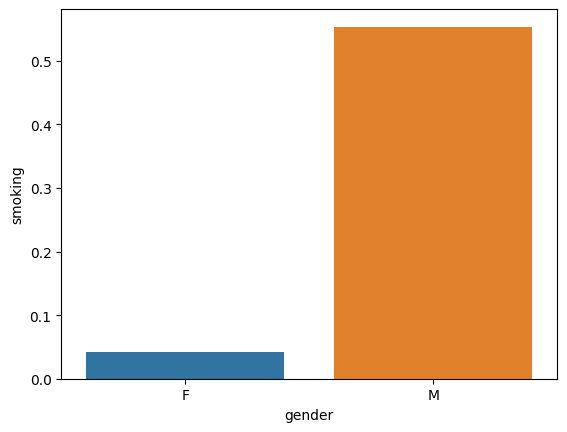

In [8]:
sns.barplot(data,x = 'gender', y= 'smoking',ci = None)
plt.show()

## Count of male and female over smoking rate

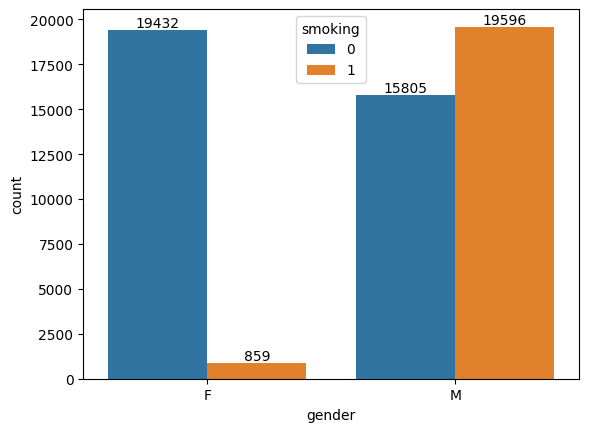

In [9]:
ax = sns.countplot(data,x = 'gender', hue= 'smoking')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## Percentage of people who smokes

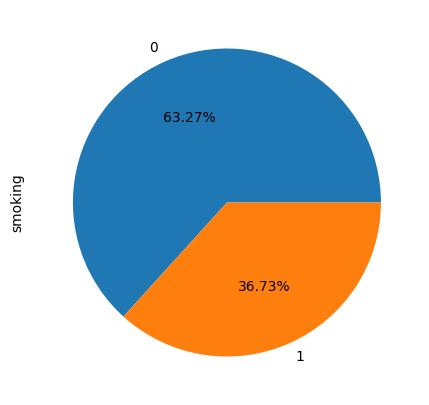

In [10]:
plt.figure(figsize = (10,5))
data['smoking'].value_counts().plot.pie(autopct = '%0.2f%%')
plt.show()

## Age group who smokes

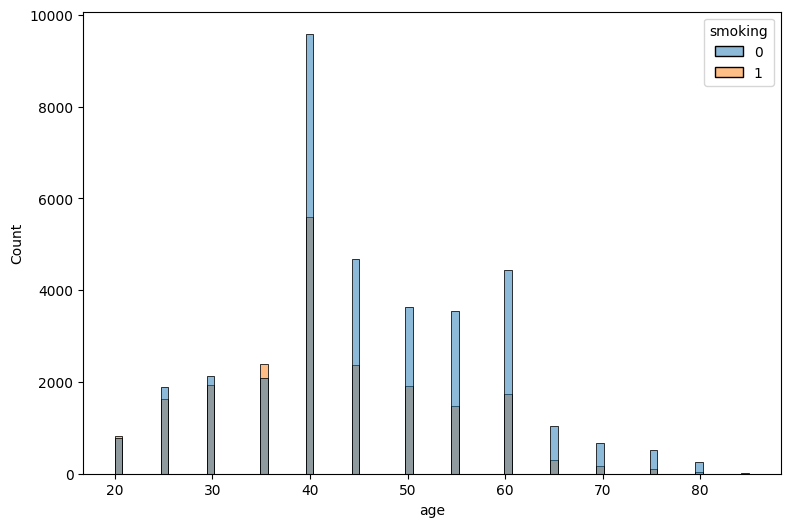

In [11]:
plt.figure(figsize = (9,6))
sns.histplot(x = data['age'],hue = data['smoking'])
plt.show()

## Visualizing outliers

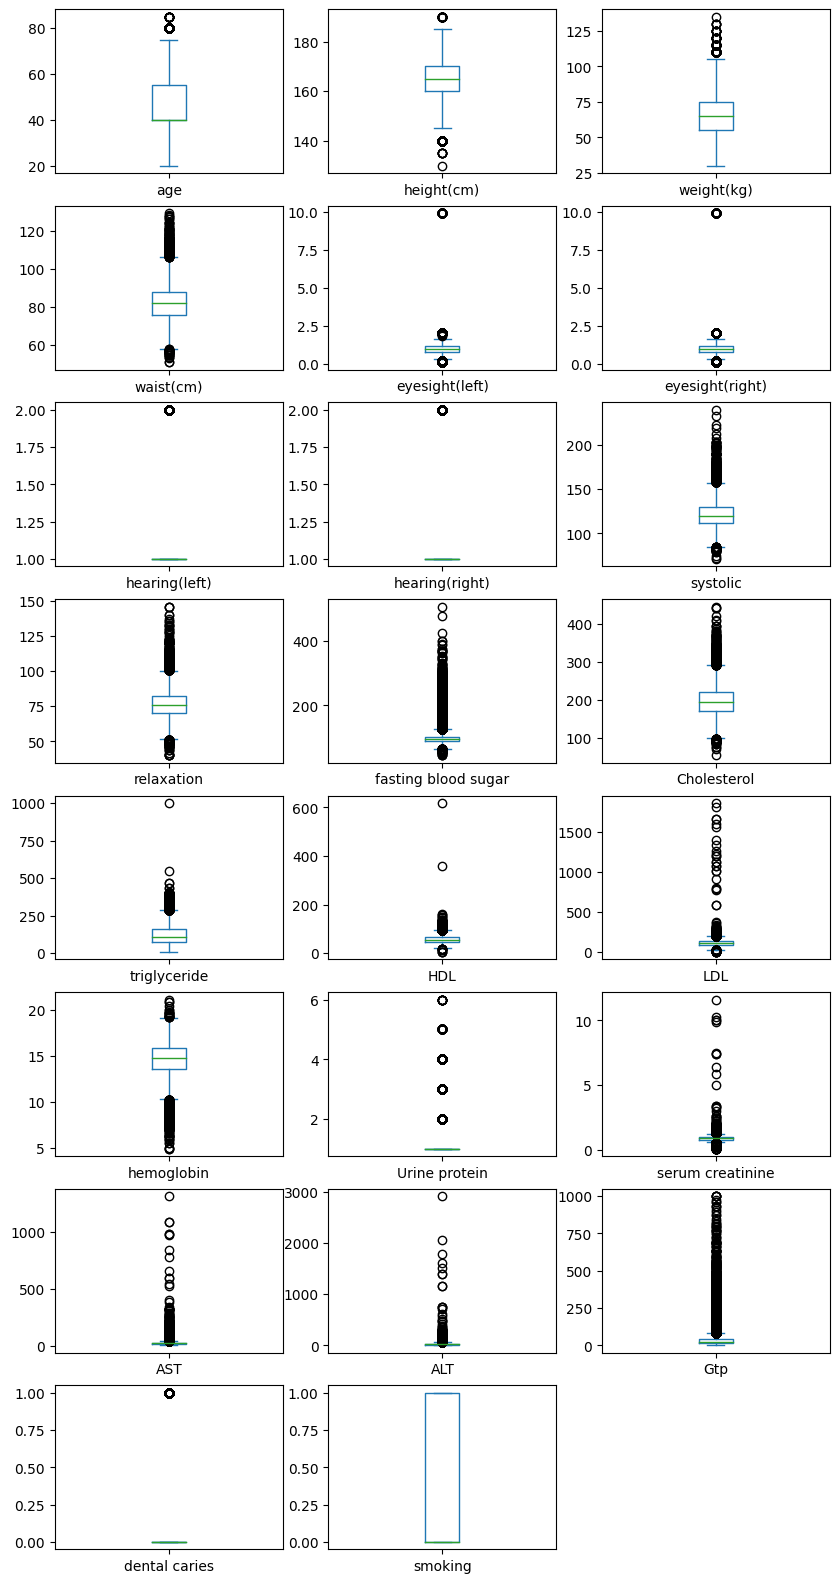

In [12]:
data.plot(kind = 'box',subplots = True, layout = (8,3), figsize = (10,20))
plt.show()

## Label Encoding 

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['tartar'] = le.fit_transform(data['tartar'])
data['dental caries'] = le.fit_transform(data['dental caries'])
data['oral'] = le.fit_transform(data['oral'])

## Feature Importances

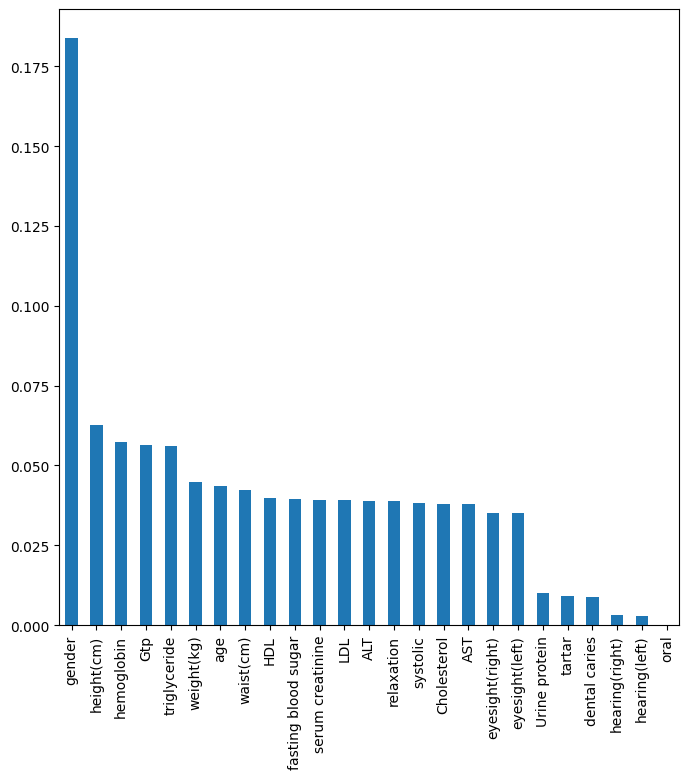

In [14]:
x = data.drop(columns = 'smoking',axis = 1)
y = data[['smoking']]

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
data1 = pd.Series(model.feature_importances_, index = x.columns)
data1 = data1.sort_values(ascending = False)
plt.figure(figsize = (8,8))
data1.plot(kind = 'bar')
plt.show()


## Selecting columns

In [15]:
selected_col = data1.index[:15]
selected_col

Index(['gender', 'height(cm)', 'hemoglobin', 'Gtp', 'triglyceride',
       'weight(kg)', 'age', 'waist(cm)', 'HDL', 'fasting blood sugar',
       'serum creatinine', 'LDL', 'ALT', 'relaxation', 'systolic'],
      dtype='object')

## Splitting dataset, Scaling and importing models

In [16]:
x = data[selected_col]
y = data['smoking']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 1000)
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators = 1000)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)

## Helper function for model evaluation

In [17]:
def model_evaluate(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    from sklearn import metrics
    print(f"Accuracy = {metrics.accuracy_score(y_test,y_pred)}\n")
    print(f"Classification Report = \n{metrics.classification_report(y_test,y_pred)}")
    cm = metrics.confusion_matrix(y_test,y_pred,labels = model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    print("Confusion Matrix:\n")
    disp.plot()
    plt.show()
    
    return {'Accuracy':metrics.accuracy_score(y_test,y_pred)}

In [18]:
compare_results = {}

## Linear Regression

Accuracy = 0.7443217524014724

Classification Report = 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      7098
           1       0.63      0.71      0.67      4041

    accuracy                           0.74     11139
   macro avg       0.73      0.74      0.73     11139
weighted avg       0.75      0.74      0.75     11139

Confusion Matrix:



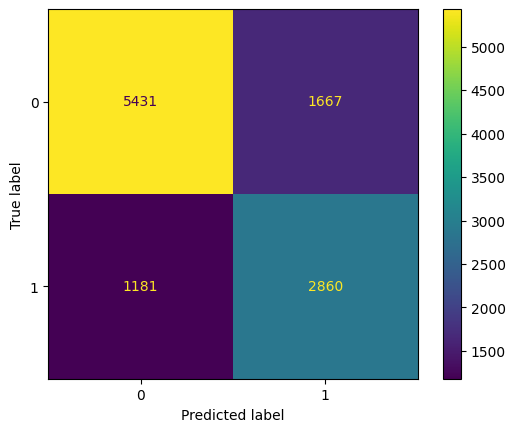

In [19]:
compare_results['Linear Regression'] = model_evaluate(lr)

## Decision Tree

Accuracy = 0.7823862106113655

Classification Report = 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7098
           1       0.70      0.70      0.70      4041

    accuracy                           0.78     11139
   macro avg       0.76      0.77      0.76     11139
weighted avg       0.78      0.78      0.78     11139

Confusion Matrix:



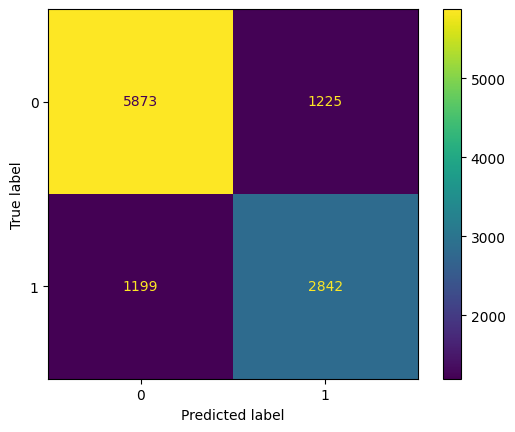

In [20]:
compare_results['Decision Tree'] = model_evaluate(dt)

## Bagging Classifier

Accuracy = 0.829966783373732

Classification Report = 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7098
           1       0.75      0.79      0.77      4041

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139

Confusion Matrix:



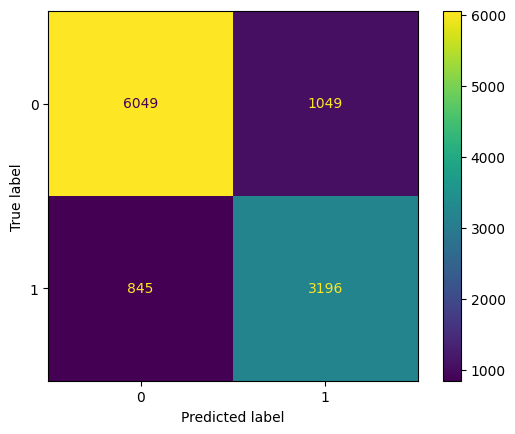

In [21]:
compare_results['Bagging Classifier'] = model_evaluate(bagging_clf)

## Extra Trees Classifier

Accuracy = 0.8323009246790556

Classification Report = 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7098
           1       0.75      0.82      0.78      4041

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.84      0.83      0.83     11139

Confusion Matrix:



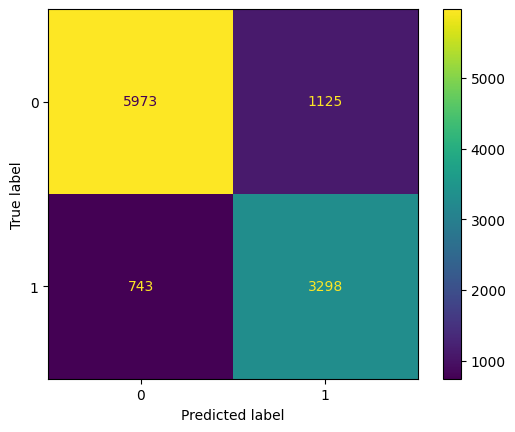

In [22]:
compare_results['Extra Tress Classifier'] = model_evaluate(et)

## Random Forest

Accuracy = 0.8315827273543406

Classification Report = 
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7098
           1       0.75      0.80      0.78      4041

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139

Confusion Matrix:



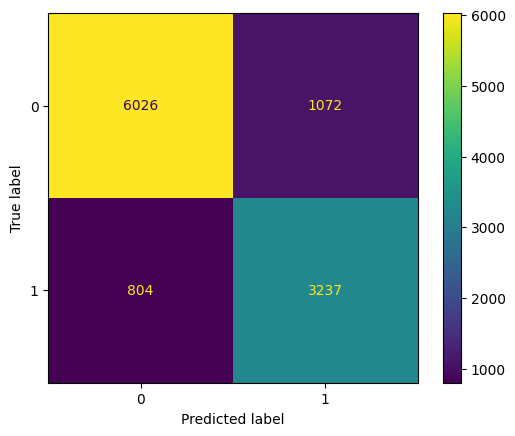

In [23]:
compare_results['Random Forest Classifier'] = model_evaluate(rfc )

In [24]:
compare_results = pd.DataFrame(compare_results)
compare_results

,Linear Regression,Decision Tree,Bagging Classifier,Extra Tress Classifier,Random Forest Classifier
Accuracy,0.744322,0.782386,0.829967,0.832301,0.831583
